### Import SUM shit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import time

In [2]:
from pylab import rcParams
import seaborn as sb

# Standard data visualisaton params for Jupyter
%matplotlib inline
rcParams['figure.figsize'] = 15, 4
sb.set_style('whitegrid')

### Getting dataset

In [3]:

# np.random.randint(low=0, high=1000, size=(50, 1))

df_data = pd.DataFrame(
    [1, 2, 5, 10, 11, 17, 18, 21, 25, 33, 34, 36], 
    columns=['minz']
)
df_data

,minz
0,1
1,2
2,5
3,10
4,11
5,17
6,18
7,21
8,25
9,33


In [4]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(
    affinity='euclidean', 
    compute_full_tree='auto',
    connectivity=None, 
    linkage='ward', 
    memory=None, 
    n_clusters=2,
    pooling_func='deprecated'
).fit(df_data)

print(model.get_params())

{'affinity': 'euclidean', 'compute_full_tree': 'auto', 'connectivity': None, 'linkage': 'ward', 'memory': None, 'n_clusters': 2, 'pooling_func': 'deprecated'}


In [5]:
print('[1 2 3 4 5 7 8 9 9]')
# print(model.fit_predict(df_data))
print(model.labels_)

[1 2 3 4 5 7 8 9 9]
[1 1 1 1 1 0 0 0 0 0 0 0]


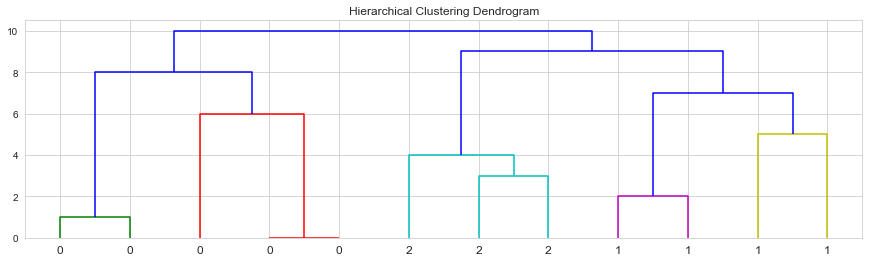

In [6]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(
    affinity='euclidean', 
    compute_full_tree='auto',
    connectivity=None, 
    linkage='ward', 
    memory=None, 
    n_clusters=3,
    pooling_func='deprecated'
)

model = model.fit(df_data)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)  # [1, 2, 5, 10, 11, 17, 18, 21, 25, 33, 34, 36]
plt.show()



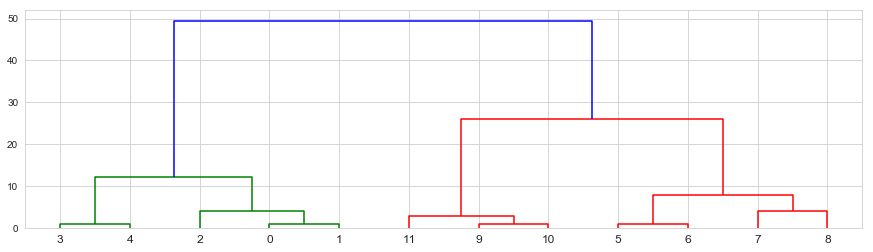

[1, 2, 5, 10, 11, 17, 18, 21, 25, 33, 34, 36]


array([2, 2, 2, 1, 1, 4, 4, 5, 5, 3, 3, 3], dtype=int32)

In [7]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
#from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# X, cl = make_blobs(n_samples=20, n_features=2, centers=3, cluster_std=0.5, random_state=0)
Z = linkage(df_data, method='ward')

plt.figure()
dendrogram(Z)
plt.show()

print( [1, 2, 5, 10, 11, 17, 18, 21, 25, 33, 34, 36] )
clusters = fcluster(Z, 5, criterion='distance')
clusters

In [8]:
adr = '../datasets/mtcars.csv'
cars = pd.read_csv(adr)
cars.columns = ['car_names', 'mpg', 'a', 'b', 'v', 'c', 'x', 'z', 'p', 's', 'd', 'f']
X = cars.ix[:, (1, 3, 4, 6)].values
X
y = cars.ix[:, (9)].values
y
cars

FileNotFoundError: File b'../datasets/mtcars.csv' does not exist

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
Z = linkage(df_data, 'single')

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
dn2 = dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

In [ ]:
Z = hierarchy.linkage(df_data, 'ward')

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
print(Z)
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()
Z